# Momentum Indicators with TA-Lib in Jupyter Notebook

This notebook demonstrates various **Momentum Indicators** provided by the [TA-Lib](https://mrjbq7.github.io/ta-lib/) library. Each section includes a description of the function, the code to compute it, and a corresponding chart.

## Table of Contents
1. [Setup](#Setup)
2. [Average Directional Movement Index (ADX)](#ADX)
3. [Average Directional Movement Index Rating (ADXR)](#ADXR)
4. [Absolute Price Oscillator (APO)](#APO)
5. [Aroon](#AROON)
6. [Aroon Oscillator (AROONOSC)](#AROONOSC)
7. [Balance Of Power (BOP)](#BOP)
8. [Commodity Channel Index (CCI)](#CCI)
9. [Chande Momentum Oscillator (CMO)](#CMO)
10. [Directional Movement Index (DX)](#DX)
11. [Moving Average Convergence/Divergence (MACD)](#MACD)
12. [MACD with Controllable MA Type (MACDEXT)](#MACDEXT)
13. [Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)](#MACDFIX)
14. [Money Flow Index (MFI)](#MFI)
15. [Minus Directional Indicator (MINUS_DI)](#MINUS_DI)
16. [Minus Directional Movement (MINUS_DM)](#MINUS_DM)
17. [Momentum (MOM)](#MOM)
18. [Plus Directional Indicator (PLUS_DI)](#PLUS_DI)
19. [Plus Directional Movement (PLUS_DM)](#PLUS_DM)
20. [Percentage Price Oscillator (PPO)](#PPO)
21. [Rate of Change (ROC)](#ROC)
22. [Rate of Change Percentage (ROCP)](#ROCP)
23. [Rate of Change Ratio (ROCR)](#ROCR)
24. [Rate of Change Ratio 100 Scale (ROCR100)](#ROCR100)
25. [Relative Strength Index (RSI)](#RSI)
26. [Stochastic (STOCH)](#STOCH)
27. [Stochastic Fast (STOCHF)](#STOCHF)
28. [Stochastic Relative Strength Index (STOCHRSI)](#STOCHRSI)
29. [1-day Rate-Of-Change of a Triple Smooth EMA (TRIX)](#TRIX)
30. [Ultimate Oscillator (ULTOSC)](#ULTOSC)
31. [Williams' %R (WILLR)](#WILLR)

---

In [2]:
!pip install wget
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

zsh:1: command not found: wget
tar: Error opening archive: Failed to open 'ta-lib-0.4.0-src.tar.gz'
[Errno 2] No such file or directory: 'ta-lib/'
/Users/loicmancino/PycharmProjects/scientificProject2/notebooks/ta-libs
zsh:1: no such file or directory: ./configure
make: *** No targets specified and no makefile found.  Stop.


/Users/loicmancino/PycharmProjects/scientificProject2/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


make: *** No rule to make target `install'.  Stop.


In [6]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib

%matplotlib inline

In [7]:
# Download sample data
data = yf.download('AAPL', start='2023-01-01', end='2024-09-17')
data = data[['Close', 'High', 'Low', 'Open', 'Volume']]
data.dropna(inplace=True)
# Display the first few rows
data.head()

[*********************100%***********************]  1 of 1 completed
/var/folders/vk/f0zqgnwn4kbbspdxkgd84my00000gn/T/ipykernel_5938/542812994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,125.070000,130.899994,124.169998,130.279999,112117500
2023-01-04,126.360001,128.660004,125.080002,126.889999,89113600
2023-01-05,125.019997,127.769997,124.760002,127.129997,80962700
2023-01-06,129.619995,130.289993,124.889999,126.010002,87754700
2023-01-09,130.149994,133.410004,129.889999,130.470001,70790800


Average Directional Movement Index (ADX)
Average Directional Movement Index (ADX) measures the strength of a trend without regard to its direction.

Note: The ADX function has an unstable period.


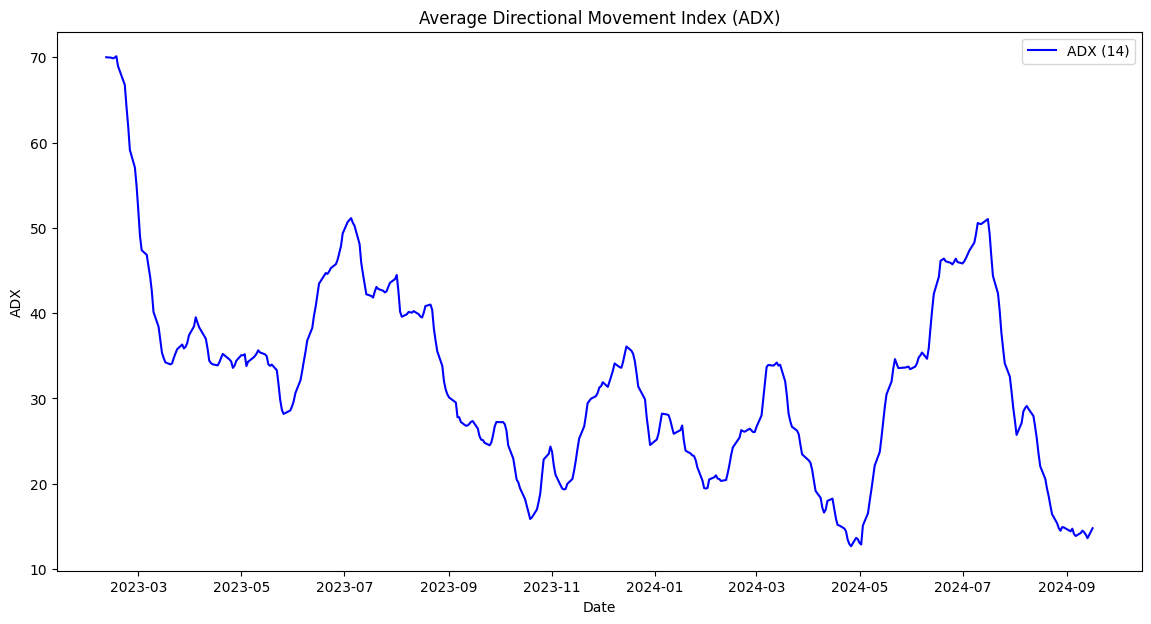

In [12]:
# Compute ADX
adx = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, adx, label='ADX (14)', color='blue')
plt.title('Average Directional Movement Index (ADX)')
plt.xlabel('Date')
plt.ylabel('ADX')
plt.legend()
plt.show()


Average Directional Movement Index Rating (ADXR)
Average Directional Movement Index Rating (ADXR) is the average of the current ADX and the ADX from a specified number of periods ago.

Note: The ADXR function has an unstable period.

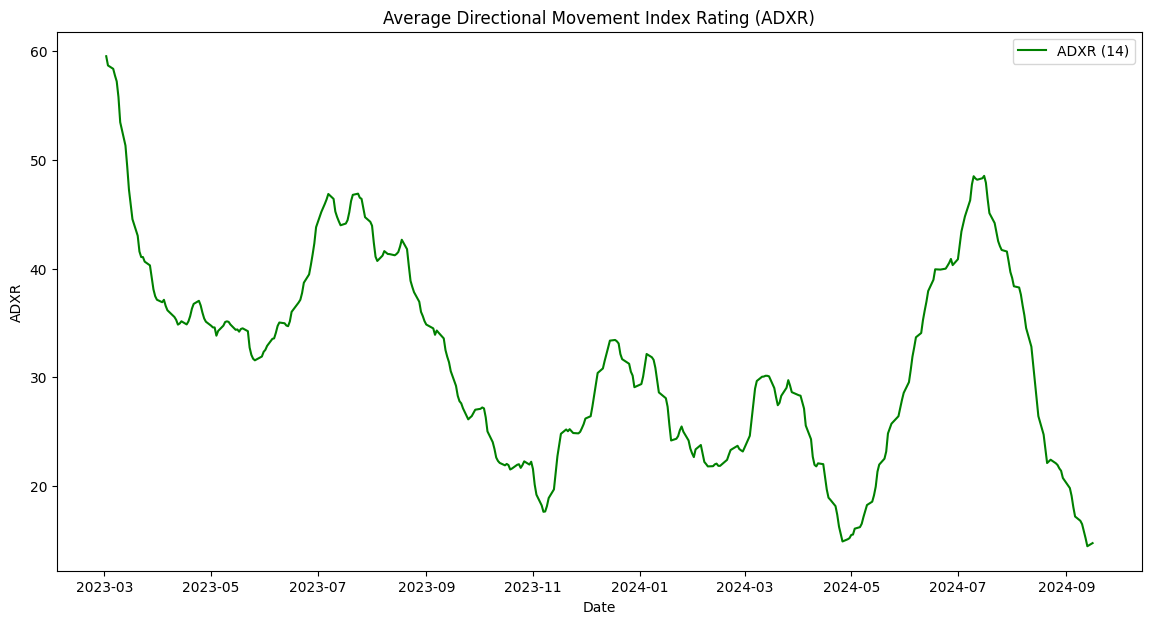

In [13]:
# Compute ADXR
adxr = talib.ADXR(data['High'], data['Low'], data['Close'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, adxr, label='ADXR (14)', color='green')
plt.title('Average Directional Movement Index Rating (ADXR)')
plt.xlabel('Date')
plt.ylabel('ADXR')
plt.legend()
plt.show()


Absolute Price Oscillator (APO)
Absolute Price Oscillator (APO) measures the difference between two moving averages.

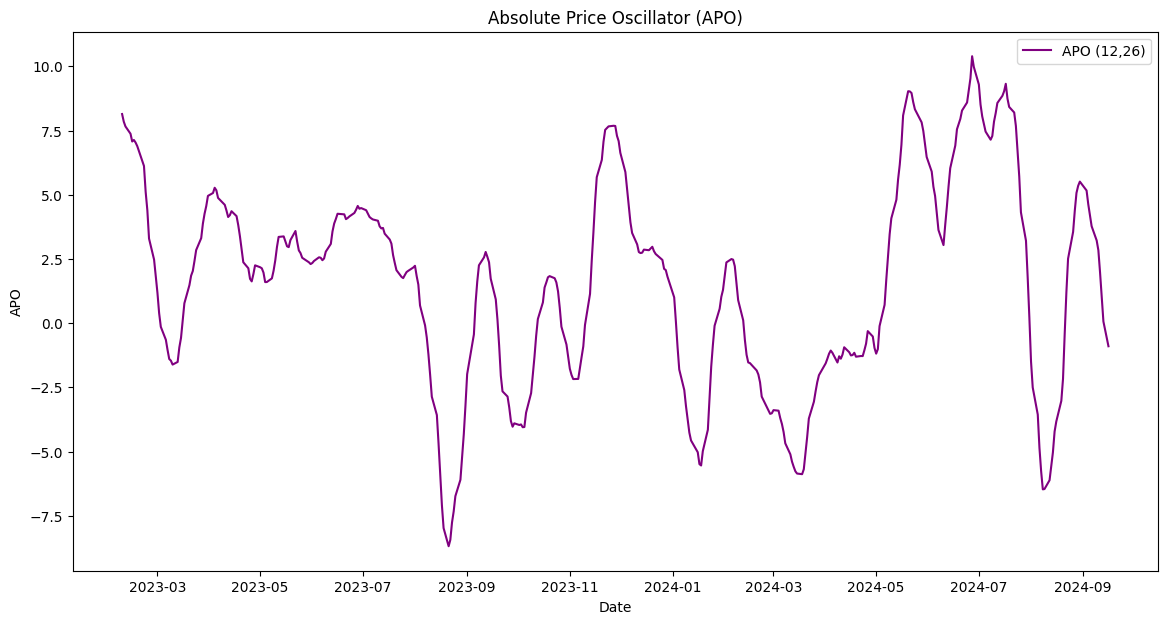

In [14]:
# Compute APO
apo = talib.APO(data['Close'], fastperiod=12, slowperiod=26, matype=0)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, apo, label='APO (12,26)', color='purple')
plt.title('Absolute Price Oscillator (APO)')
plt.xlabel('Date')
plt.ylabel('APO')
plt.legend()
plt.show()


Aroon
Aroon indicates the strength of a trend and the likelihood of its continuation.

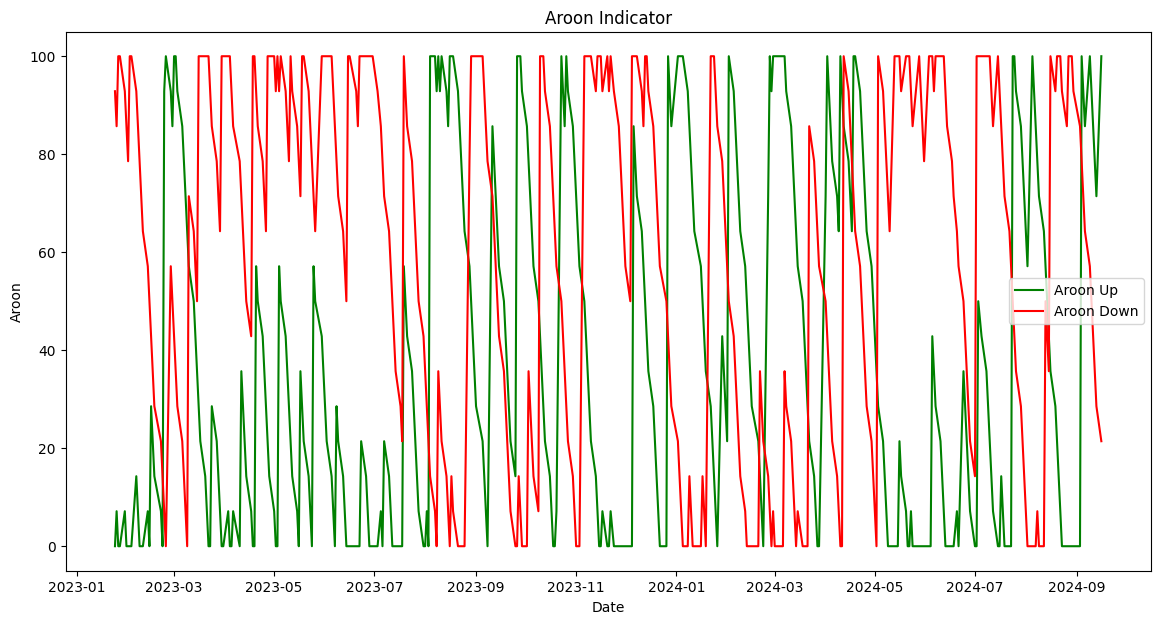

In [15]:
# Compute Aroon Up and Aroon Down
aroon_up, aroon_down = talib.AROON(data['High'], data['Low'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, aroon_up, label='Aroon Up', color='green')
plt.plot(data.index, aroon_down, label='Aroon Down', color='red')
plt.title('Aroon Indicator')
plt.xlabel('Date')
plt.ylabel('Aroon')
plt.legend()
plt.show()


Aroon Oscillator (AROONOSC)
Aroon Oscillator (AROONOSC) measures the difference between Aroon Up and Aroon Down.

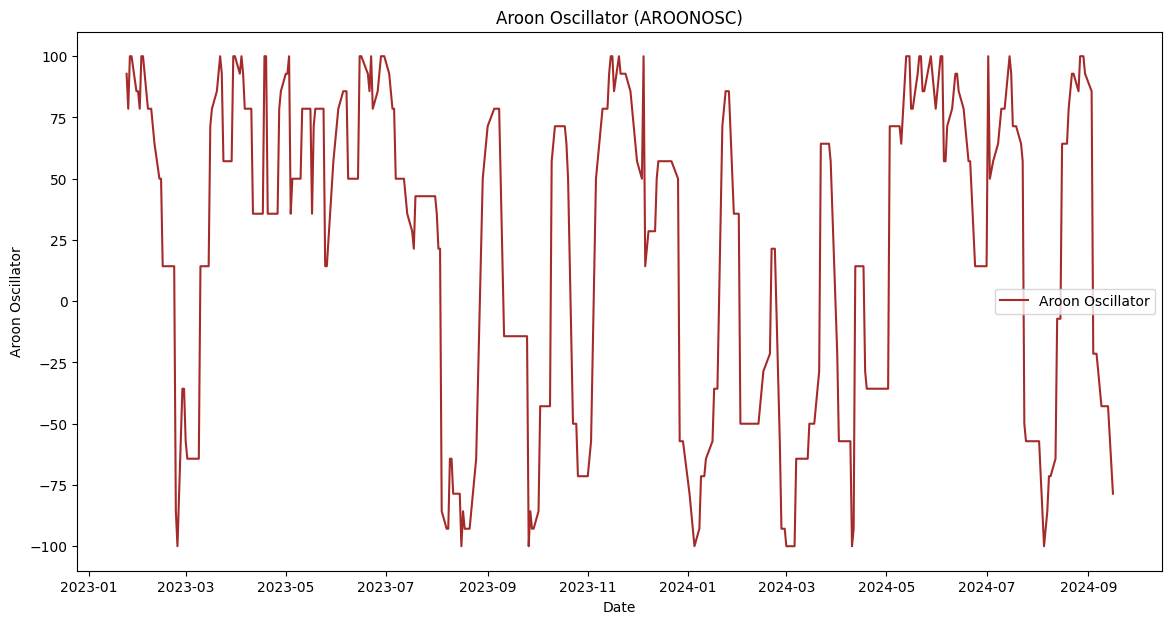

In [16]:
# Compute Aroon Oscillator
aroon_osc = talib.AROONOSC(data['High'], data['Low'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, aroon_osc, label='Aroon Oscillator', color='brown')
plt.title('Aroon Oscillator (AROONOSC)')
plt.xlabel('Date')
plt.ylabel('Aroon Oscillator')
plt.legend()
plt.show()


Balance Of Power (BOP)
Balance Of Power (BOP) measures the strength of buying and selling pressure.



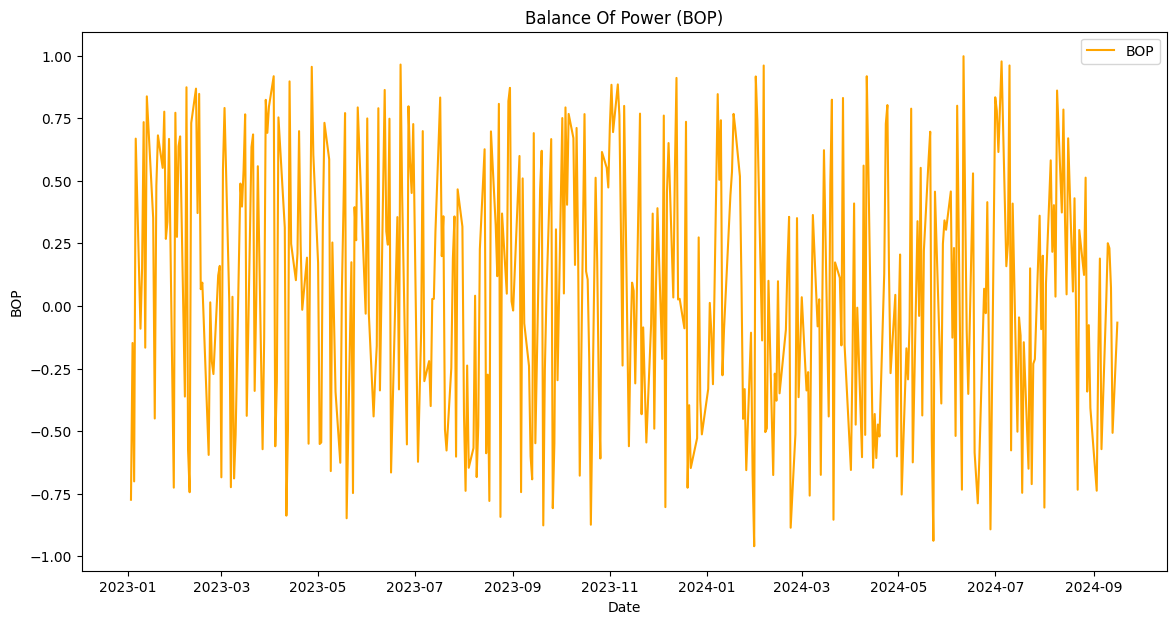

In [17]:
# Compute BOP
bop = talib.BOP(data['Open'], data['High'], data['Low'], data['Close'])

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, bop, label='BOP', color='orange')
plt.title('Balance Of Power (BOP)')
plt.xlabel('Date')
plt.ylabel('BOP')
plt.legend()
plt.show()


Commodity Channel Index (CCI)
Commodity Channel Index (CCI) measures the deviation of the price from its statistical mean.

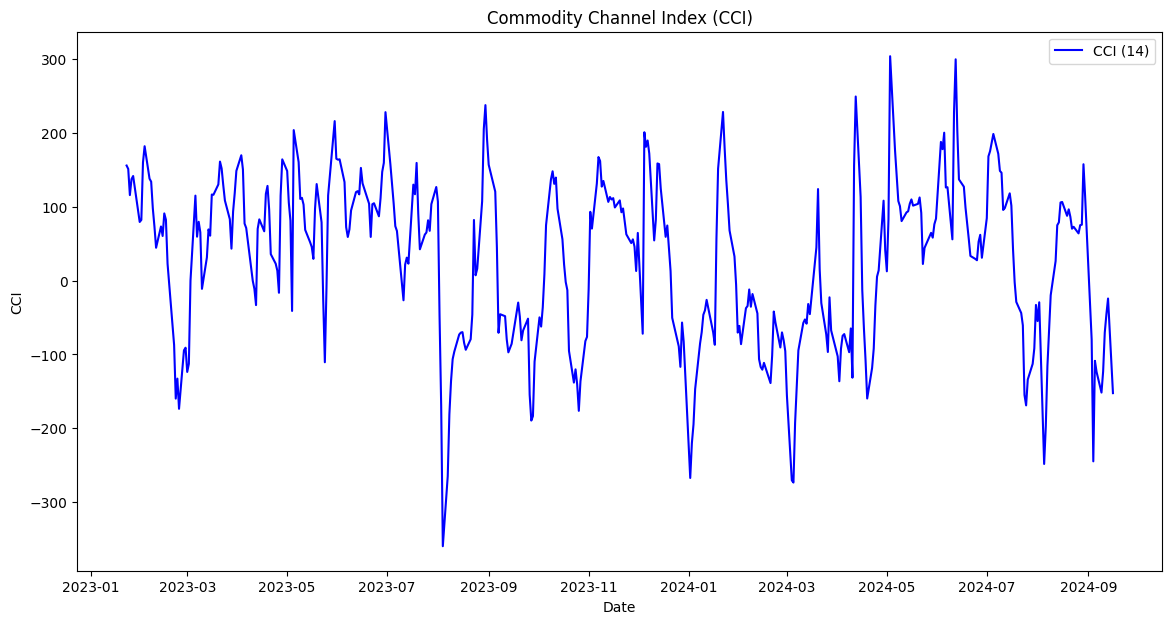

In [18]:
# Compute CCI
cci = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, cci, label='CCI (14)', color='blue')
plt.title('Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.show()


Chande Momentum Oscillator (CMO)
Chande Momentum Oscillator (CMO) measures the momentum of price changes.

Note: The CMO function has an unstable period.

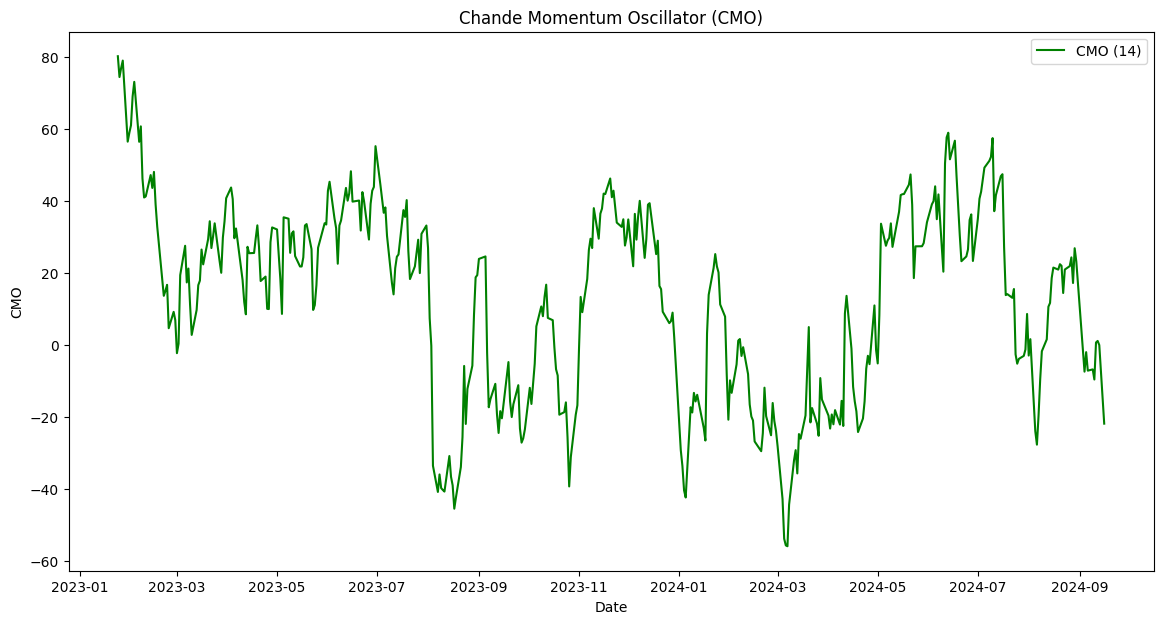

In [19]:
# Compute CMO
cmo = talib.CMO(data['Close'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, cmo, label='CMO (14)', color='green')
plt.title('Chande Momentum Oscillator (CMO)')
plt.xlabel('Date')
plt.ylabel('CMO')
plt.legend()
plt.show()


Directional Movement Index (DX)
Directional Movement Index (DX) quantifies trend strength.

Note: The DX function has an unstable period.



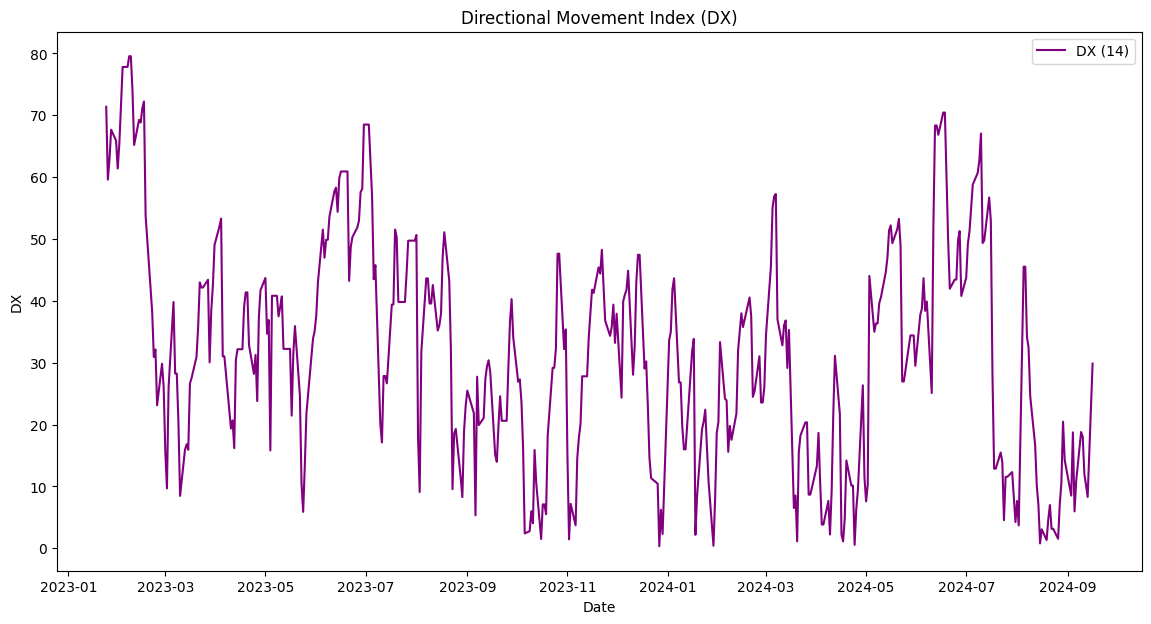

In [20]:
# Compute DX
dx = talib.DX(data['High'], data['Low'], data['Close'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, dx, label='DX (14)', color='purple')
plt.title('Directional Movement Index (DX)')
plt.xlabel('Date')
plt.ylabel('DX')
plt.legend()
plt.show()



Moving Average Convergence/Divergence (MACD)
Moving Average Convergence/Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages.

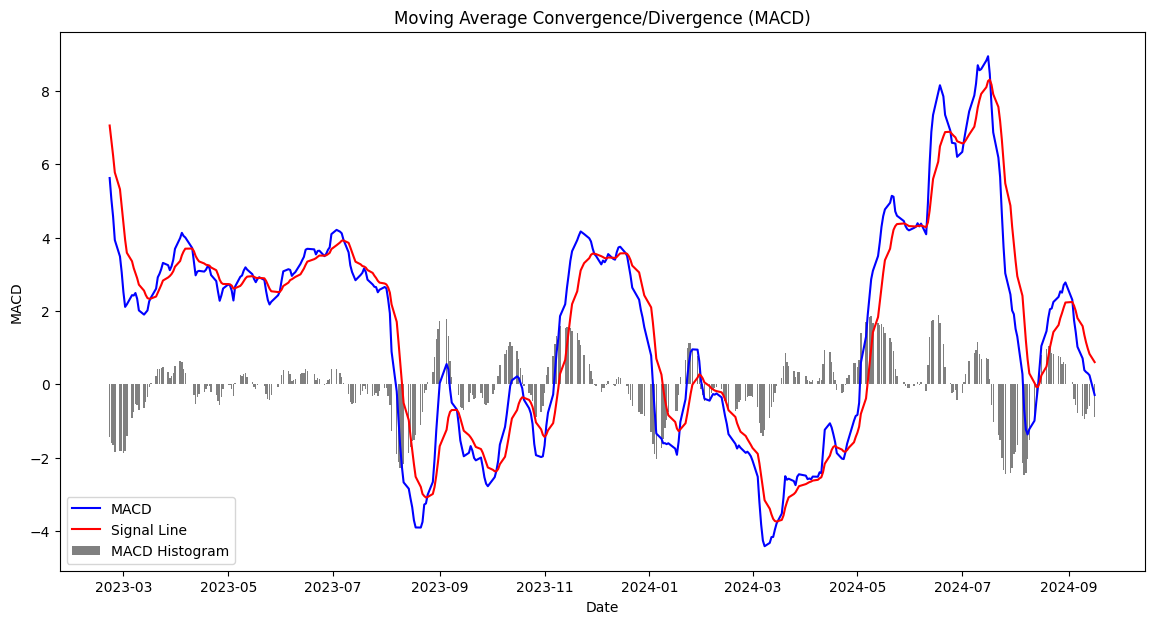

In [21]:
# Compute MACD
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, macd, label='MACD', color='blue')
plt.plot(data.index, macdsignal, label='Signal Line', color='red')
plt.bar(data.index, macdhist, label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence/Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


MACD with Controllable MA Type (MACDEXT)
MACDEXT allows for controllable moving average types in MACD computation.

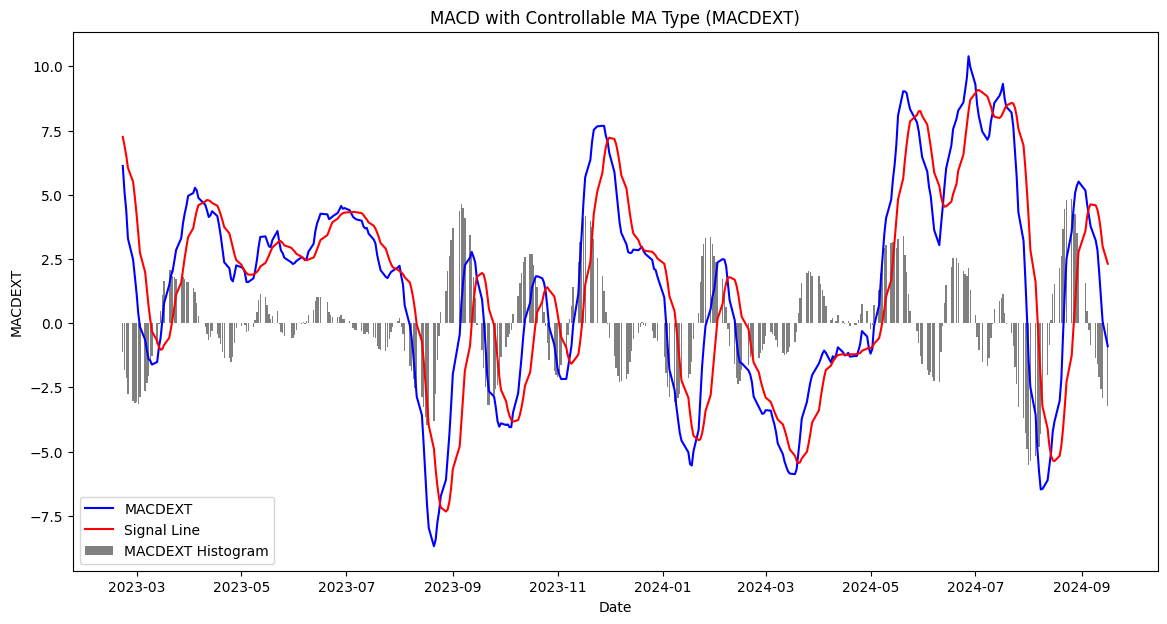

In [22]:
# Compute MACDEXT
macd_ext, macd_ext_signal, macd_ext_hist = talib.MACDEXT(data['Close'],
                                                         fastperiod=12,
                                                         fastmatype=0,
                                                         slowperiod=26,
                                                         slowmatype=0,
                                                         signalperiod=9,
                                                         signalmatype=0)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, macd_ext, label='MACDEXT', color='blue')
plt.plot(data.index, macd_ext_signal, label='Signal Line', color='red')
plt.bar(data.index, macd_ext_hist, label='MACDEXT Histogram', color='gray')
plt.title('MACD with Controllable MA Type (MACDEXT)')
plt.xlabel('Date')
plt.ylabel('MACDEXT')
plt.legend()
plt.show()


Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)
MACDFIX is a fixed version of MACD with standard periods.


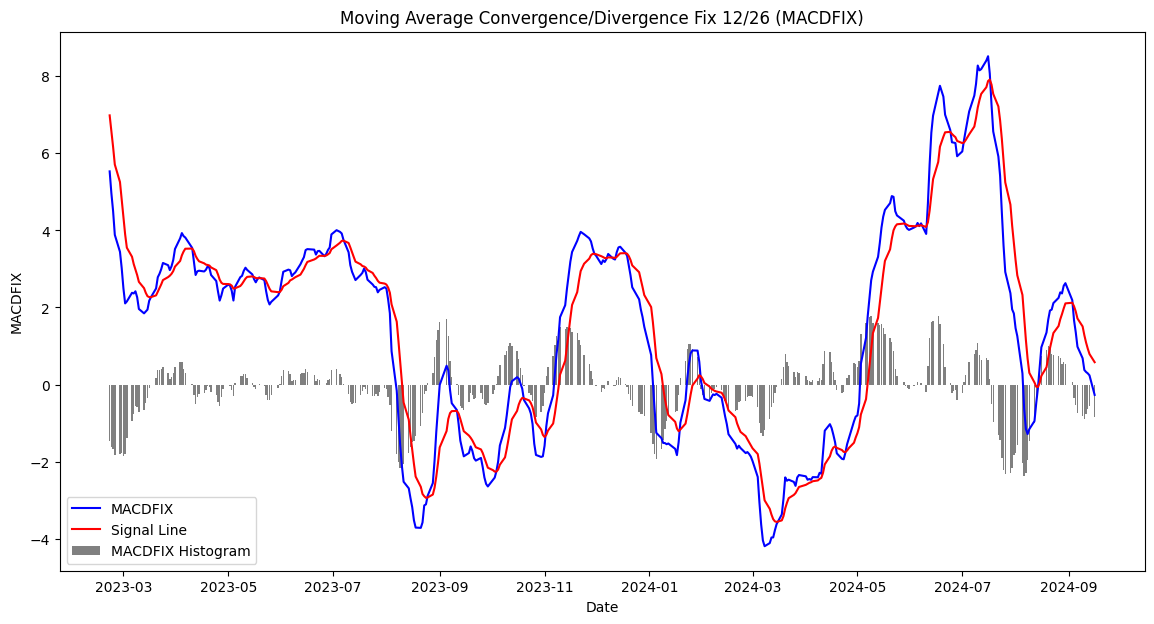

In [24]:
# Compute MACDFIX
macd_fix, macd_fix_signal, macd_fix_hist = talib.MACDFIX(data['Close'], signalperiod=9)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, macd_fix, label='MACDFIX', color='blue')
plt.plot(data.index, macd_fix_signal, label='Signal Line', color='red')
plt.bar(data.index, macd_fix_hist, label='MACDFIX Histogram', color='gray')
plt.title('Moving Average Convergence/Divergence Fix 12/26 (MACDFIX)')
plt.xlabel('Date')
plt.ylabel('MACDFIX')
plt.legend()
plt.show()


Money Flow Index (MFI)
Money Flow Index (MFI) measures the inflow and outflow of money into a security.

Note: The MFI function has an unstable period.

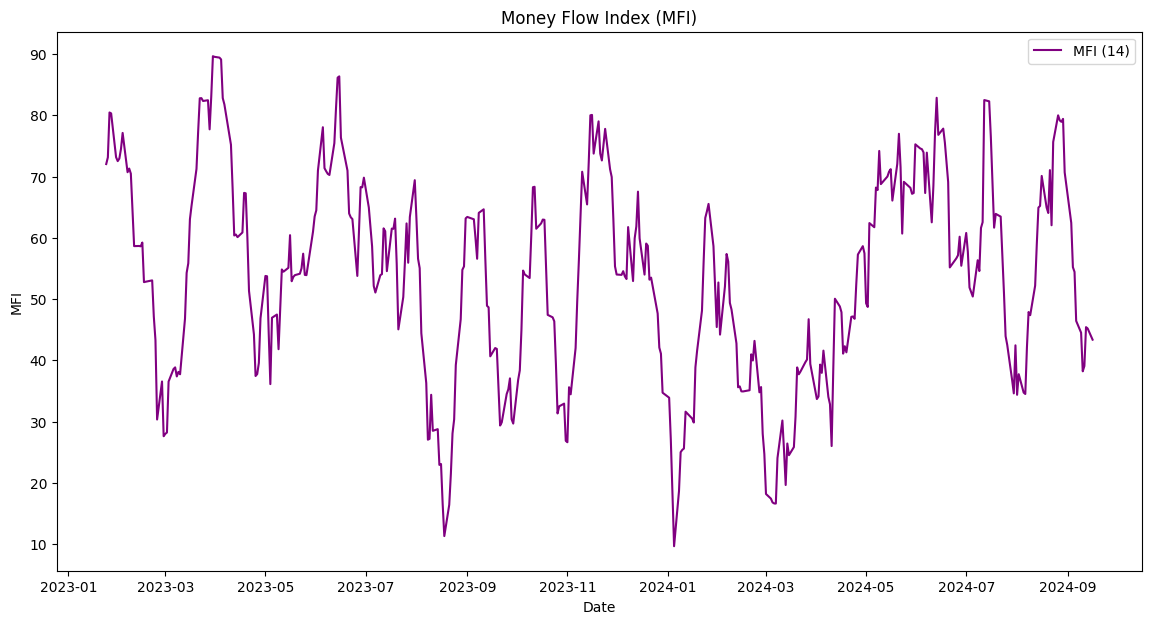

In [25]:
# Compute MFI
mfi = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, mfi, label='MFI (14)', color='purple')
plt.title('Money Flow Index (MFI)')
plt.xlabel('Date')
plt.ylabel('MFI')
plt.legend()
plt.show()


Minus Directional Indicator (MINUS_DI)
Minus Directional Indicator (MINUS_DI) measures the strength of the downtrend.

Note: The MINUS_DI function has an unstable period.

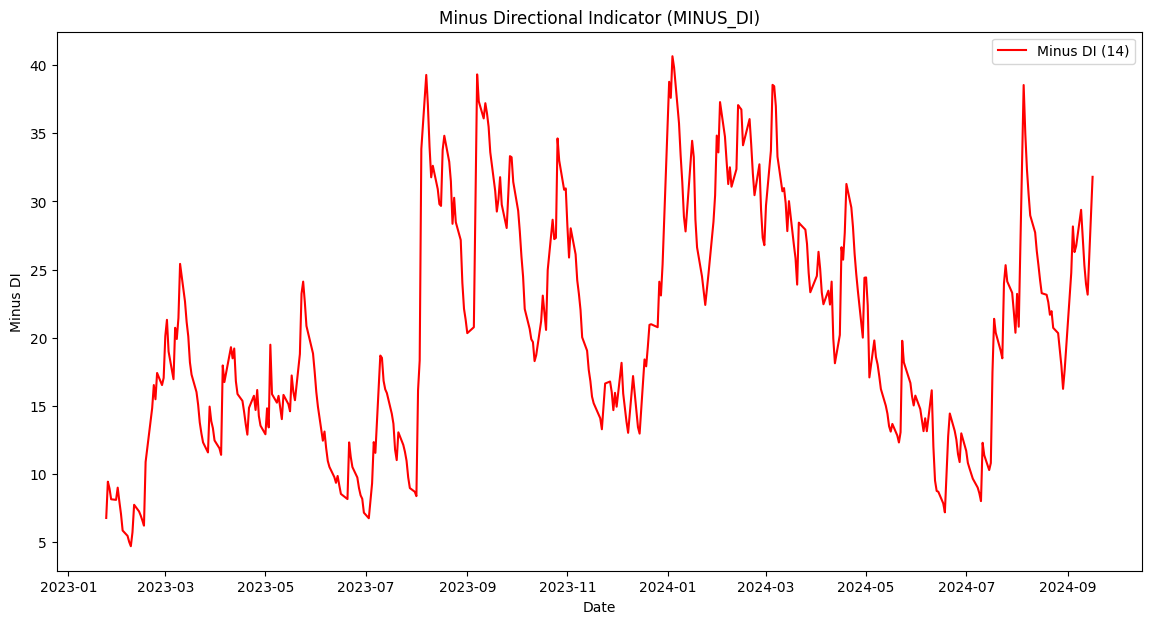

In [26]:
# Compute MINUS_DI
minus_di = talib.MINUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, minus_di, label='Minus DI (14)', color='red')
plt.title('Minus Directional Indicator (MINUS_DI)')
plt.xlabel('Date')
plt.ylabel('Minus DI')
plt.legend()
plt.show()
